In [1]:
import math
import numpy as np
from matplotlib import pyplot as ppl

%matplotlib inline

In [2]:
N = 500
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

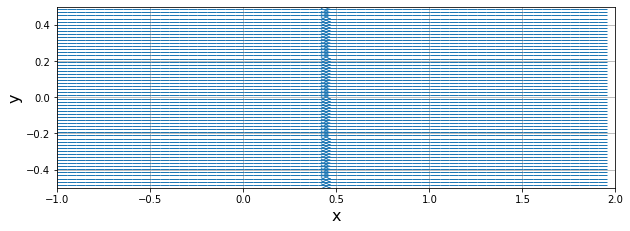

In [3]:
alpha = 0.#-np.pi/6
u_inf = 1.0

u_freestream = u_inf * np.ones((N, N), dtype=float) * np.cos(alpha)
v_freestream = u_inf * np.ones((N, N), dtype=float) * np.sin(alpha)

psi_freestream = u_inf * (Y * np.cos(alpha) - X * np.sin(alpha))

size = 10
ppl.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
ppl.grid(True)
ppl.xlabel('x', fontsize=16)
ppl.ylabel('y', fontsize=16)
ppl.xlim(x_start, x_end)
ppl.ylim(y_start, y_end)
ppl.streamplot(X, Y, u_freestream, v_freestream, density=2, linewidth=1, arrowsize=2, arrowstyle='->')

In [4]:
X_sources = np.loadtxt('lessons/resources/NACA0012_x.txt')
Y_sources = np.loadtxt('lessons/resources/NACA0012_y.txt')
strength_sources = np.loadtxt('lessons/resources/NACA0012_sigma.txt')

In [5]:
def get_velocity(strength, xs, ys, X, Y):

    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
   
    psi = strength/(2*np.pi)*np.arctan2((Y-ys), (X-xs))
    return psi

In [6]:
U_sources = np.zeros((N, N))
V_sources = np.copy(U_sources)
psi_sources = np.copy(U_sources)

for i in range(len(strength_sources)):
    
    U_source, V_source = get_velocity(strength_sources[i], X_sources[i], Y_sources[i], X, Y)
    U_sources += U_source
    V_sources += V_source
    
    psi_source = get_stream_function(strength_sources[i], X_sources[i], Y_sources[i], X, Y)
    psi_sources += psi_source

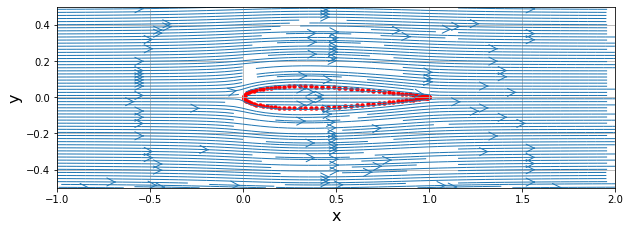

In [7]:
u = u_freestream + U_sources
v = v_freestream + V_sources
psi = psi_freestream + psi_sources

size = 10
ppl.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
ppl.grid(True)
ppl.xlabel('x', fontsize=16)
ppl.ylabel('y', fontsize=16)
ppl.xlim(x_start, x_end)
ppl.ylim(y_start, y_end)
ppl.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=2, arrowstyle='->')

ppl.scatter(X_sources, Y_sources, color='r', s=20, marker='o', linewidth=0)

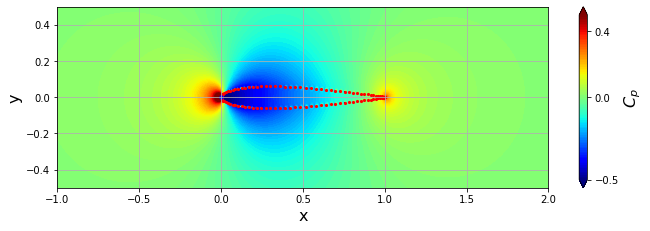

In [10]:
Cp = 1.0 - (u**2+v**2)/u_inf**2

size = 10
ppl.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
ppl.grid(True)
ppl.xlabel('x', fontsize=16)
ppl.ylabel('y', fontsize=16)
ppl.xlim(x_start, x_end)
ppl.ylim(y_start, y_end)

contf = ppl.contourf(X, Y, Cp, levels=np.linspace(-0.5, 0.5, 100), extend='both', cmap='jet')
cbar = ppl.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.5, 0., 0.4])

#точка максимума Ср
ppl.scatter(X_sources, Y_sources, color='r', s=10, marker='o', linewidth=0)
ppl.scatter(x[np.where(Cp==np.amax(Cp))[1]], y[np.where(Cp==np.amax(Cp))[0]], color='b', s=20, marker='o', linewidth=0)

In [11]:
velocity = (u**2 + v**2)**(0.5)
print(np.where(velocity==np.amax(velocity)))
print(1 - (np.amin(velocity)/u_inf)**2)

(array([270]), array([178]))
0.9718836603960311
